# Isling Model

In [8]:
from ising import Ising
import numpy as np
from matplotlib import pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [2]:
# Initialise Variables
L, B, J, beta = 100, -0.05, 0.5, 1

num_therm = 100

mag_per_spin_arr = np.zeros(num_therm)
visual_arr = []

# Initialise the Ising Model with the Constants

In [3]:
ising = Ising(L,J,B, beta)


In [4]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.001
fp = flatten_point(rav, threshold)

## Check Average Mag per Spin with varying J


In [12]:
j_vals = np.linspace(-1,1,50)
b_vals = np.linspace(-1,1,50)
avg_mags = np.zeros((len(j_vals), len(b_vals)))  # Initialize avg_mags as a 2D array
avg_mags_err = np.zeros((len(j_vals), len(b_vals)))
i = 0
# for i, j in enumerate(j_vals):
#     for k, b in enumerate(b_vals):
#         ising = Ising(L,j,b, beta)
#         for l in range(num_therm):
#             ising.do_thermalisation_sweep()
#             mag_per_spin_arr[l] = ising.get_mag_per_spin()
#         # mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(num_therm)])
#         rav = calculate_running_average(mag_per_spin_arr, 5)
#         fp = flatten_point(rav, threshold)
#         # print(f'j: {j}, b: {b}, fp: {fp}')
#         avg_mags[i, k] = np.mean(mag_per_spin_arr[fp:])  # Store the average magnetisation in the 2D array
#         avg_mags_err[i, k] = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:])) # Store the average magnetisation in the 2D array
#         i += 1
#         print(i)

In [14]:
from joblib import Parallel, delayed

def compute_avg_mags(i, j, k, b):
    ising = Ising(L,j,b, beta)
    mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(num_therm)])
    rav = calculate_running_average(mag_per_spin_arr, 5)
    fp = flatten_point(rav, threshold)
    avg_mag = np.mean(mag_per_spin_arr[fp:])
    avg_mag_err = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:]))
    print(i)
    return i, k, avg_mag, avg_mag_err

results = Parallel(n_jobs=-1)(delayed(compute_avg_mags)(i, j, k, b) for i, j in enumerate(j_vals) for k, b in enumerate(b_vals))

for i, k, avg_mag, avg_mag_err in results:
    avg_mags[i, k] = avg_mag
    avg_mags_err[i, k] = avg_mag_err

5852.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.89s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.90s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.91s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.92s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.93s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
5852.94s - pydevd: Sending message related to proc

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
9
9

In [6]:
print(max(avg_mags.flatten()))

0.9999030303030304


In [110]:
import numpy as np

# Save the arrays to disk
# np.save('avg_mags.npy', avg_mags)
# np.save('avg_mags_err.npy', avg_mags_err)

avg_mags = np.load('avg_mags.npy')
avg_mags_err = np.load('avg_mags_err.npy')

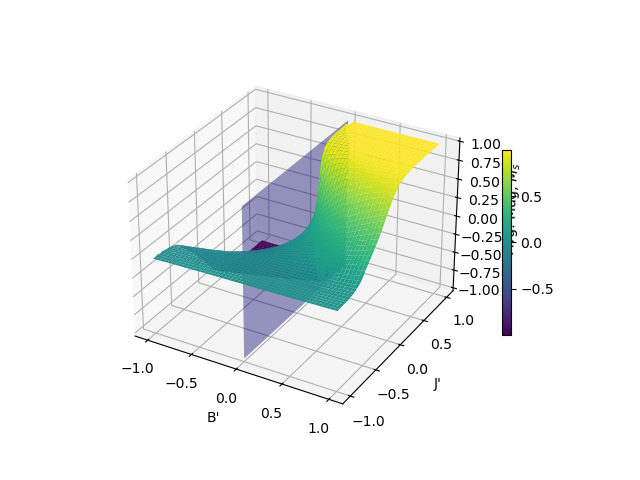

In [112]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["savefig.format"] = "svg"

%matplotlib ipympl

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

J, B = np.meshgrid(j_vals, b_vals)

surf = ax.plot_surface(J, B, avg_mags,cmap='viridis')
# for i in range(J.shape[0]):
#     for j in range(J.shape[1]):
#         ax.plot([J[i, j], J[i, j]], [B[i, j], B[i, j]], [avg_mags[i, j] - avg_mags_err[i, j], avg_mags[i, j] + avg_mags_err[i, j]], color='k')

ax.set_xlabel('B\'')
ax.set_ylabel('J\'')
ax.set_zlim(-1,1)
ax.set_zlabel(r'Avg. Mag, $M_s$')
fig.colorbar(surf, shrink=0.5, aspect=20)

J_vals = np.linspace(j_vals.min(), j_vals.max(), 100)
avg_mags_vals = np.linspace(avg_mags.min(), avg_mags.max(), 100)
J_grid, avg_mags_grid = np.meshgrid(J_vals, avg_mags_vals)

# Set B = 0 for all points in the grid
B_grid = np.zeros_like(J_grid)

# Plot the plane
ax.plot_surface(B_grid, J_grid, avg_mags_grid, alpha=0.4, rstride=100, cstride=100, color='b')


# # Create a grid of points in the B and avg_mags dimensions
# B_vals = np.linspace(b_vals.min(), b_vals.max(), 100)
# avg_mags_vals = np.linspace(avg_mags.min(), avg_mags.max(), 100)
# B_grid, avg_mags_grid = np.meshgrid(B_vals, avg_mags_vals)

# # Set J = 0.44 for all points in the grid
# J_grid = np.full_like(0.44, B_grid)

# # Plot the plane
# ax.plot_surface(J_grid, B_grid, avg_mags_grid, alpha=0.6, rstride=100, cstride=100)
# Show the plot
# Existing 3D plot code
# ax = fig.add_subplot(111, projection='3d')
plt.show()

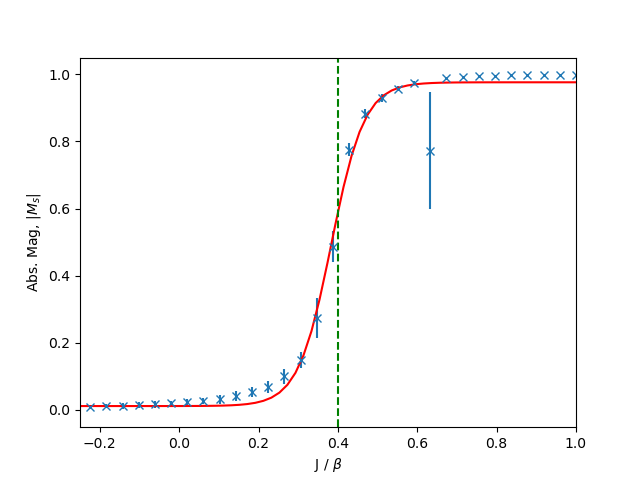

[(0.011337458124286104, -1.0), (0.01133745812429221, -0.9591836734693877), (0.011337458124308364, -0.9183673469387755), (0.011337458124351496, -0.8775510204081632), (0.01133745812446646, -0.8367346938775511), (0.011337458124772548, -0.7959183673469388), (0.011337458125588062, -0.7551020408163265), (0.011337458127760547, -0.7142857142857143), (0.011337458133547917, -0.6734693877551021), (0.011337458148964974, -0.6326530612244898), (0.011337458190034955, -0.5918367346938775), (0.011337458299442604, -0.5510204081632654), (0.011337458590896965, -0.5102040816326531), (0.011337459367311009, -0.4693877551020409), (0.011337461435624474, -0.4285714285714286), (0.011337466945467944, -0.3877551020408164), (0.011337481623308554, -0.34693877551020413), (0.011337520724056416, -0.30612244897959184), (0.01133762488572232, -0.26530612244897966), (0.011337902365069596, -0.22448979591836737), (0.011338641550035111, -0.1836734693877552), (0.011340610682011698, -0.1428571428571429), (0.011345856273867028, 

In [103]:
# Create a new subplot for the intersection
fig2, ax2 = plt.subplots()

# Find the index where b = 0
b_zero_index = np.argmin(np.abs(b_vals))
def z(x):
    return np.exp(-2*x)
def onsager(x):
    first = np.power(1 + np.power(z(x),2),0.25)
    second_expression = 1 - (6 * np.power(z(x),2)) + (np.power(z(x),4))
    print("second_expression: ", second_expression)
    second = np.power(second_expression,0.125)
    third = np.power(1 - np.power(z(x),2),0.5)
    val = np.abs(first * second / third )
    print("first: ", first)
    print("second: ", second)
    print("third: ", third)
    return val
# Extract the values for b = 0

def tanh(x,a ,b, c, d):
    return a + b * np.tanh(c * (x - d))

from scipy.optimize import curve_fit

# Fit the data
p0 = [0.5, 0.5, 0.5,0]
popt, pcov = curve_fit(tanh, j_vals, np.abs(avg_mags[:,b_zero_index]),  )

# Plot the original data
ax2.errorbar(j_vals, np.abs(avg_mags[:,b_zero_index]), yerr=avg_mags_err[:,b_zero_index]*10, fmt='x')

# Plot the fitted curve
j_vals_fit = np.linspace(j_vals.min(), j_vals.max(), 100)
ax2.plot(j_vals_fit, tanh(j_vals_fit, *popt), 'r-')
ax2.axvline(x=0.4, color='g', linestyle='--')
# ax2.plot(j_vals_fit, onsager(j_vals_fit), 'r-')
# Set labels and limits
ax2.set_xlabel(r'J / $\beta$')
ax2.set_xlim(-0.25,1)
ax2.set_ylabel(r'Abs. Mag, $|M_s|$')

# Show the plot
plt.show()
print(list(zip(tanh(j_vals, *popt), j_vals)))

In [66]:
# Find the index where b = 0
from joblib import Parallel, delayed
j_vals = np.linspace(0.3,0.5,100)
avg_mag_bzero = np.zeros(len(j_vals))
avg_mag_err_bzero = np.zeros(len(j_vals))
def compute_avg_mags_bzero(i, j):
    ising = Ising(100,j,0, 1)
    mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(1000)])
    rav = calculate_running_average(mag_per_spin_arr, 5)
    fp = flatten_point(rav, 0.001)
    avg_mag = np.mean(mag_per_spin_arr[fp:])
    avg_mag_err = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:]))
    print(i)
    return i, avg_mag, avg_mag_err

results = Parallel(n_jobs=-1)(delayed(compute_avg_mags_bzero)(i, j) for i, j in enumerate(j_vals))

for i, avg_mag, avg_mag_err in results:
    avg_mag_bzero[i] = avg_mag
    avg_mag_err_bzero[i] = avg_mag_err
    

plt.errorbar(j_vals, avg_mag_bzero, yerr=avg_mag_err_bzero, fmt='o')

10552.36s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.39s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
10552.41s - pydevd: Sending message rela

4
3
5
8
7
1
6
2
0
10
9
11
12
20
17
16
13
15
18
19
21
14
22
23
24
26
28
30
25
27
33
32
29
31
34
35
36
38
37
39
42
40
41
44
46
45
43
47
48
51
49
50
53
52
55
54
56
58
57
59
60
61
62
63
65
64
66
68
67
69
70
71
72
73
75
74
76
77
78
79
80
81
82
84
83
85
87
86
88
90
89
91
93
92
94
95
97
98
99
96


<ErrorbarContainer object of 3 artists>

ValueError: 'x' and 'y' must have the same size

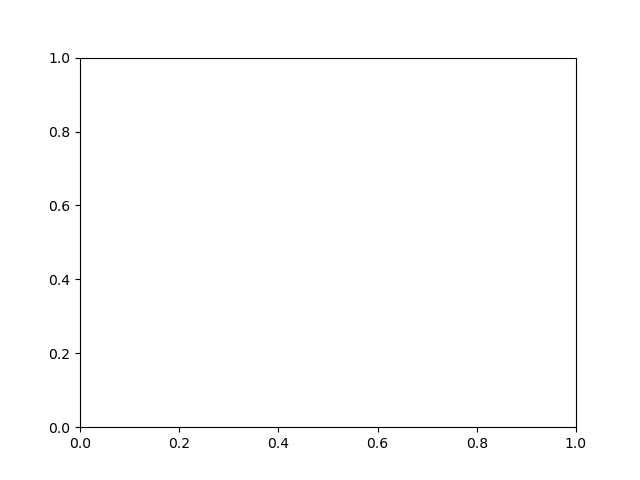

In [109]:
# np.save('avg_mag_bzero.npy', avg_mag_bzero), np.save('avg_mag_err_bzero.npy', avg_mag_err_bzero)
avg_mag_bzero, avg_mag_err_bzero =  np.load('avg_mag_bzero.npy'), np.load('avg_mag_err_bzero.npy')
err = avg_mag_err_bzero * np.sqrt(10)*1

plt.figure()
plt.errorbar(j_vals, np.abs(avg_mag_bzero), yerr=err, fmt='x')
plt.xlabel('J')
plt.ylabel(r'Avg. Mag, $M_s$')
plt.show()